# Problem Statement:

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

Variable	Description

Loan_ID	Unique Loan ID

Gender	Male/ Female

Married	Applicant married (Y/N)

Dependents	Number of dependents

Education	Applicant Education (Graduate/ Under Graduate)

Self_Employed	Self employed (Y/N)

ApplicantIncome	Applicant income

CoapplicantIncome	Coapplicant income

LoanAmount	Loan amount in thousands

Loan_Amount_Term	Term of loan in months

Credit_History	credit history meets guidelines

Property_Area	Urban/ Semi Urban/ Rural

Loan_Status	Loan approved (Y/N)

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('train_data.csv')
test=pd.read_csv('test_data.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
train_original=train.copy()
test_original=test.copy()

In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
train.shape

(614, 13)

In [8]:
test.shape

(367, 12)

# univariate analysis

In [9]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

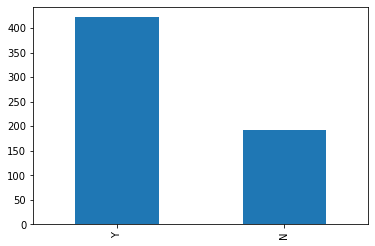

In [11]:
train['Loan_Status'].value_counts().plot.bar()

#We can say the Loan of 425 people out of 614 was approved or we can say approx 69%

#Categorical feature : Gender,Married,Self_Employed,Credit_History,Loan_status

#Ordinal feature : Dependents,Education,Property_area

#Numerical feature : applicant_income,coapplicant_income,loan_amount_term,loan_amount

In [12]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# categorical feature

In [13]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

<AxesSubplot:title={'center':'Gender'}>

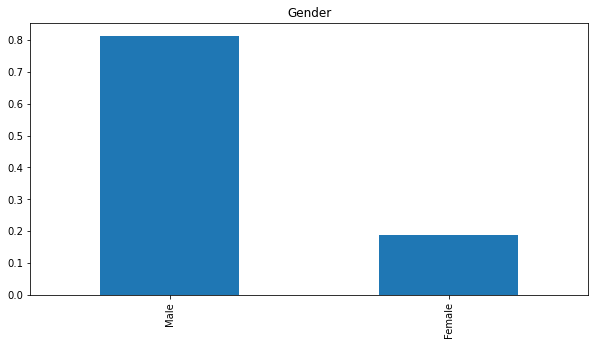

In [14]:
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(10,5),title='Gender')

In [15]:
train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

<AxesSubplot:title={'center':'Married'}>

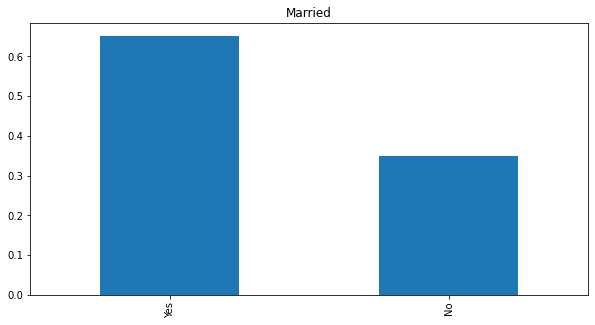

In [16]:
train['Married'].value_counts(normalize=True).plot.bar(figsize=(10,5),title='Married')

In [17]:
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

<AxesSubplot:title={'center':'Self_Employed'}>

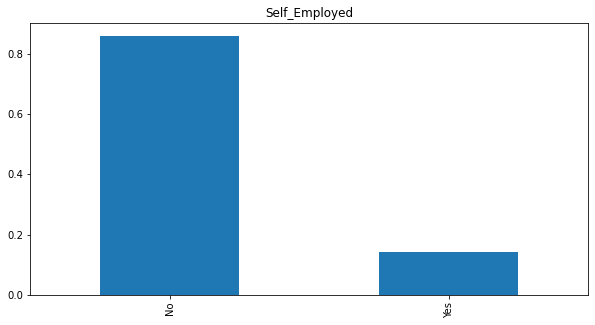

In [18]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(10,5),title='Self_Employed')

In [19]:
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

<AxesSubplot:title={'center':'Credit_History'}>

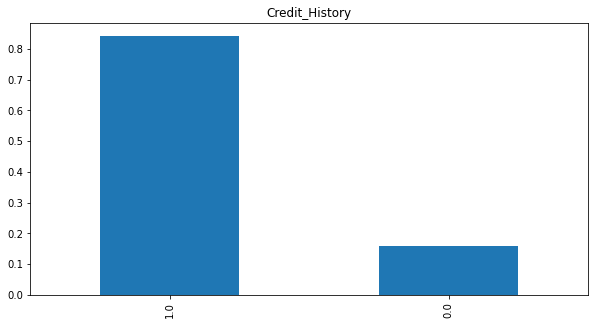

In [20]:
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(10,5),title='Credit_History')

In [21]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:title={'center':'Loan_Status'}>

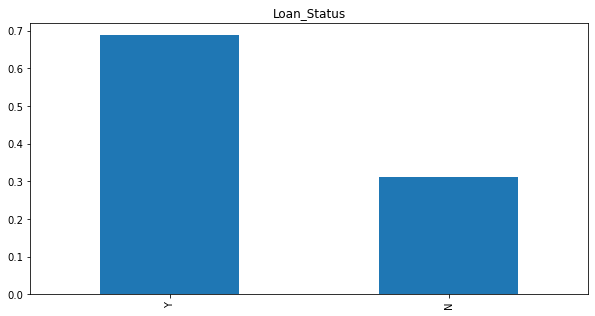

In [22]:
train['Loan_Status'].value_counts(normalize=True).plot.bar(figsize=(10,5),title='Loan_Status')

we can see that 81% applicants are male

approx 17 % are self employed

approx 65% are married

approx 85% have already paid their debts

# ordinal feature

In [23]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

<AxesSubplot:title={'center':'Dependents'}>

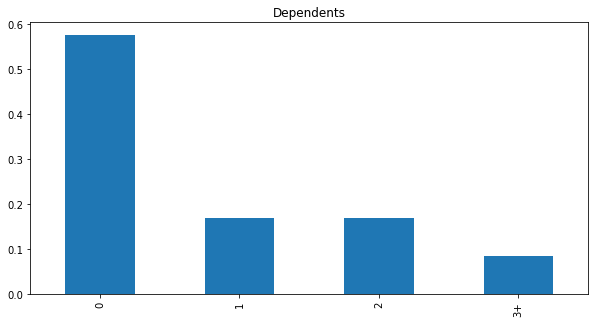

In [24]:
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(10,5),title='Dependents')

In [25]:
train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

<AxesSubplot:title={'center':'Education'}>

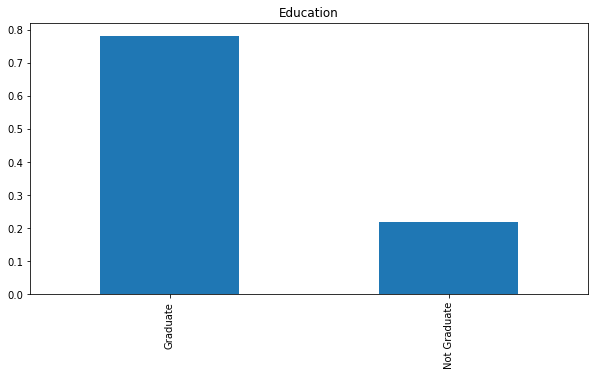

In [26]:
train['Education'].value_counts(normalize=True).plot.bar(figsize=(10,5),title='Education')

In [27]:
train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

<AxesSubplot:title={'center':'Property_area'}>

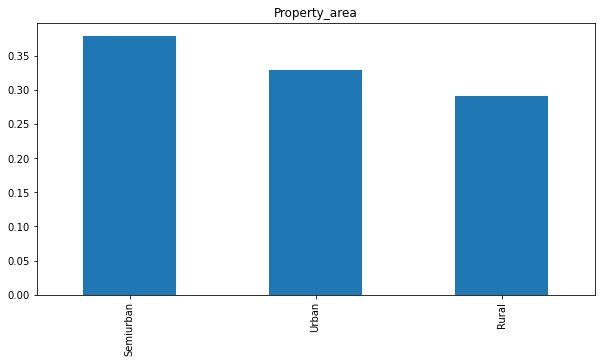

In [28]:
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(10,5),title='Property_area')

#we can say most of them have no dependent.

#approx 79% of the people are graduated.

##most of them belong to semi urban.

# Numeric feature

In [29]:
train['ApplicantIncome'].value_counts()

2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64

C:\Users\DIVYANSHI\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

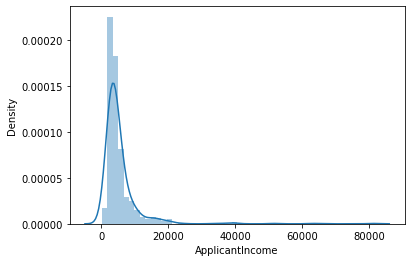

In [30]:
sns.distplot(train['ApplicantIncome'])

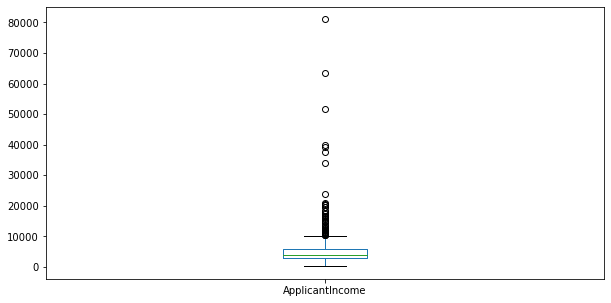

In [31]:
train['ApplicantIncome'].plot.box(figsize=(10,5))
plt.show()

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

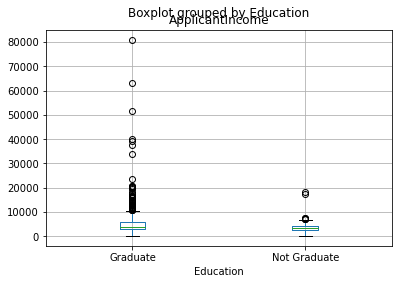

In [32]:
train.boxplot('ApplicantIncome' ,by = 'Education')

C:\Users\DIVYANSHI\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

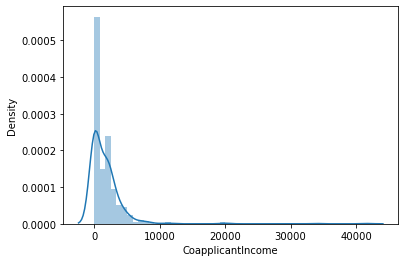

In [33]:
sns.distplot(train['CoapplicantIncome'])

<AxesSubplot:>

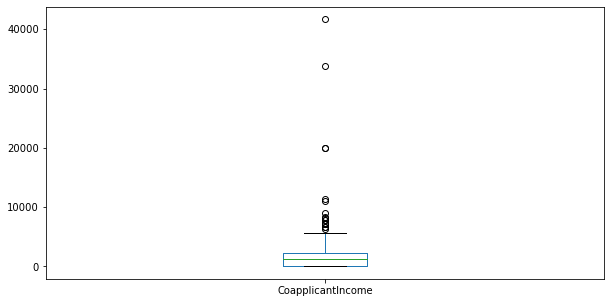

In [34]:
train['CoapplicantIncome'].plot.box(figsize=(10,5))

C:\Users\DIVYANSHI\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

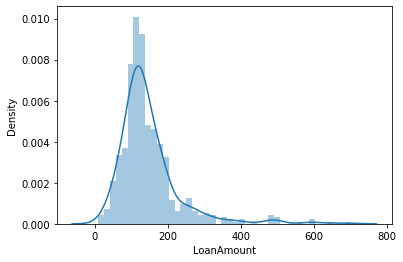

In [35]:
df=train.dropna()
sns.distplot(train['LoanAmount'])

<AxesSubplot:>

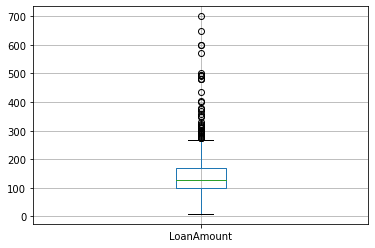

In [36]:
train.boxplot('LoanAmount')

#we can see high number of graduates with high salary and appearing as outliers.

#we can see the maximum coapplicant's income is ranging between 0 to 5000 and their are many outliers.

#we can see the data is fairly distributed in LoanAmount but their are many outliers.


# Missing values

In [37]:
train.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#for numerical variables : imputation of using mean or median

#for categorical variables : imputation of using mode

In [9]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [11]:
train['Loan_Amount_Term'].value_counts

<bound method IndexOpsMixin.value_counts of 0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
609    360.0
610    180.0
611    360.0
612    360.0
613    360.0
Name: Loan_Amount_Term, Length: 614, dtype: float64>

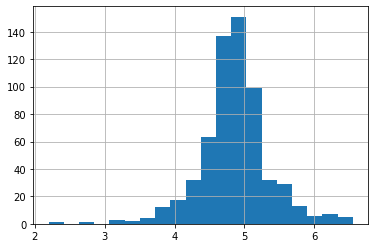

In [12]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log']=np.log(test['LoanAmount'])

#Since the distribution was not normal so we took log transformation to reduce the larger values so we can get the data
similar to normal distribution.


In [13]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)     #Dropped the varaible loan id as it does not affect loan status

In [14]:
x = train.drop('Loan_Status',1)
y = train.Loan_Status

In [15]:
x = pd.get_dummies(x)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3,random_state=10)

In [17]:
print ('X_train', x_train.shape)
print ('X_test', x_test.shape)
print ('Y_train', y_train.shape)
print ('Y_test', y_test.shape)

X_train (429, 21)
X_test (185, 21)
Y_train (429,)
Y_test (185,)


In [24]:
from sklearn.preprocessing import PowerTransformer
PT = PowerTransformer()
PT.fit(x_train)
x_train = PT.transform(x_train)
x_train = pd.DataFrame(x_train)
x_train.columns = x_train.columns
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.553849,1.086498,-0.189262,-2.411688,0.449089,-0.196720,-0.493435,0.493435,1.414214,-1.414214,...,-0.464002,-0.460287,-0.311748,0.526104,-0.526104,-2.324432,2.324432,-0.648483,-0.794468,1.467791
1,-0.940734,0.848447,-0.362253,0.138934,0.449089,-0.369289,-0.493435,0.493435,-0.707107,0.707107,...,-0.464002,-0.460287,-0.311748,-1.900764,1.900764,0.430213,-0.430213,1.542061,-0.794468,-0.681296
2,2.515195,-1.094898,2.132752,0.138934,0.449089,2.159261,-0.493435,0.493435,-0.707107,0.707107,...,-0.464002,-0.460287,3.207721,0.526104,-0.526104,0.430213,-0.430213,1.542061,-0.794468,-0.681296
3,0.038359,-1.094898,-0.550662,0.138934,0.449089,-0.556701,-0.493435,0.493435,-0.707107,0.707107,...,-0.464002,-0.460287,3.207721,0.526104,-0.526104,0.430213,-0.430213,-0.648483,-0.794468,1.467791
4,-2.862228,1.151214,0.488465,0.138934,0.449089,0.483664,-0.493435,0.493435,-0.707107,0.707107,...,-0.464002,-0.460287,-0.311748,0.526104,-0.526104,-2.324432,2.324432,1.542061,-0.794468,-0.681296


In [30]:
pt = PowerTransformer()
pt.fit(x_test)
x_test = pt.transform(x_test)
x_test = pd.DataFrame(x_test)
x_test.columns = x_test.columns
x_test.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.371250,1.026448,-0.695306,0.244187,0.318105,-0.695841,-0.422308,0.422308,1.281740,-1.281740,...,-0.404379,-0.404379,-0.274921,0.533594,-0.533594,0.297044,-0.297044,1.599279,-0.753523,-0.744729
1,-0.365670,1.011102,0.119728,0.244187,0.318105,0.120048,2.367941,-2.367941,1.281740,-1.281740,...,-0.404379,-0.404379,-0.274921,0.533594,-0.533594,0.297044,-0.297044,1.599279,-0.753523,-0.744729
2,-1.417343,1.047922,0.055281,0.244187,0.318105,0.055575,-0.422308,0.422308,-0.780189,0.780189,...,-0.404379,-0.404379,-0.274921,0.533594,-0.533594,0.297044,-0.297044,-0.625282,1.327100,-0.744729
3,0.723610,1.482468,0.858641,0.244187,0.318105,0.858828,-0.422308,0.422308,-0.780189,0.780189,...,-0.404379,-0.404379,-0.274921,0.533594,-0.533594,0.297044,-0.297044,-0.625282,1.327100,-0.744729
4,0.400694,0.728272,0.835577,0.244187,0.318105,0.835774,-0.422308,0.422308,1.281740,-1.281740,...,-0.404379,-0.404379,-0.274921,0.533594,-0.533594,0.297044,-0.297044,-0.625282,1.327100,-0.744729


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score, classification_report

In [33]:
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),XGBClassifier()]


for model in models:
    print(model)
    model = model.fit(x_train, y_train)
    print("Training Accuracy")
    print(model.score(x_train,y_train))
    print("Testing Accuracy")
    print(model.score(x_test,y_test))
    print('\n')

LogisticRegression()
Training Accuracy
0.8111888111888111
Testing Accuracy
0.7891891891891892


DecisionTreeClassifier()
Training Accuracy
1.0
Testing Accuracy
0.6594594594594595


RandomForestClassifier()
Training Accuracy
1.0
Testing Accuracy
0.7675675675675676


XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)
[18:34:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: 

C:\Users\DIVYANSHI\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred= model.predict(x_test)
print("Training Accuracy")
print(model.score(x_train,y_train))
print("Testing Accuracy")
print(model.score(x_test,y_test))

Training Accuracy
0.8111888111888111
Testing Accuracy
0.7891891891891892


In [ ]:
submission=pd.read_csv('sample_submission.csv')

In [ ]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [ ]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [ ]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('logistic2.csv',index=False)

In [ ]:
submission['Loan_Status'].value_counts()